<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/0-viz/viz3_data1_finmind_5%E6%9C%88_stock_option_future_0301_0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Day 14] 回測分析
### 從零開始的套牢生活 - AI股票預測系統 系列 第 14 篇
https://ithelp.ithome.com.tw/m/articles/10267871?fbclid=IwAR0GdoJVPIJ6VfcSdAfJzWAgHoaYahPsyBVIAY9NzjhNIfmmWHfsKYJC7Os

# 引入函式庫

In [1]:
# ! pip install backtesting
import datetime
import warnings

import pandas as pd
import requests
#from backtesting import Backtest, Strategy
#from backtesting.lib import crossover
#from backtesting.test import SMA
#from pandas.core.common import SettingWithCopyWarning

#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_columns", None)


In [2]:
start_date = datetime.datetime(2023, 3, 1, 0, 0).strftime("%Y-%m-%d")
end_date = datetime.datetime(2023, 5, 17, 0, 0).strftime("%Y-%m-%d")

# 取得資料
backtesting強制要求欄位名稱格式，
所以需要先轉換欄位名稱

https://finmindtrade.com/analysis/#/data/document

## 1-股票

In [3]:
stock_index = '0050'
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "start_date": start_date,
    "end_date": end_date,
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()



In [4]:
#data

In [5]:
df1 = pd.DataFrame(data["data"])

df1.index = pd.to_datetime(df1["date"])
df1.rename(
    columns={
        "Trading_Volume": "Volume",
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df1.drop(
    columns=["stock_id", "date", "Trading_money", "spread", "Trading_turnover"],
    inplace=True,
)

df1

,Volume,Open,High,Low,Close
date,,,,,
2023-03-01,7996077,117.30,119.45,116.85,119.35
2023-03-02,3750827,119.35,119.35,118.30,119.25
2023-03-03,3341290,119.80,120.10,119.20,119.35
2023-03-06,9805282,120.15,120.90,119.90,120.50
2023-03-07,7894646,120.55,121.40,120.20,121.30
2023-03-08,6752736,120.50,120.60,119.80,120.30
2023-03-09,3505542,120.75,120.80,120.20,120.20
2023-03-10,15018299,118.85,118.95,118.00,118.30
2023-03-13,19295272,117.95,119.10,117.40,118.80


In [6]:
df1.head()

,Volume,Open,High,Low,Close
date,,,,,
2023-03-01,7996077,117.30,119.45,116.85,119.35
2023-03-02,3750827,119.35,119.35,118.30,119.25
2023-03-03,3341290,119.80,120.10,119.20,119.35
2023-03-06,9805282,120.15,120.90,119.90,120.50
2023-03-07,7894646,120.55,121.40,120.20,121.30


<Axes: xlabel='date'>

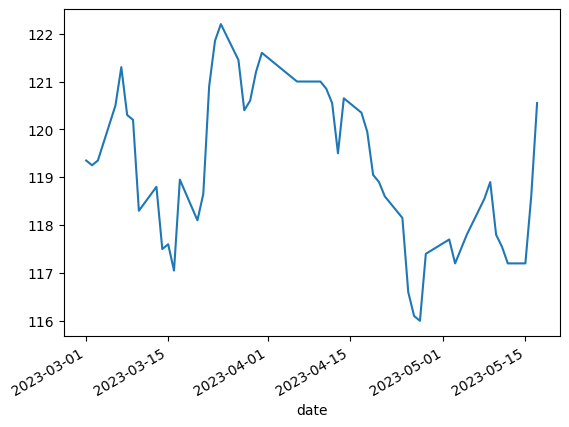

In [7]:
df1['Close'].plot()

## FinMind API 使用說明
https://finmindtrade.com/analysis/#/data/api

## 選擇權日夜盤成交資訊，包含到期月份、開高低收、漲跌幅、交易量、結算價格。
https://finmindtrade.com/analysis/#/data/document

## 2-選擇權

In [8]:
stock_index = "TXO"
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanOptionDaily",
    "start_date": start_date,
    "end_date": end_date,
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()


In [9]:
#data

In [10]:
df = pd.DataFrame(data["data"])
df.head()

,date,option_id,contract_date,strike_price,call_put,open,max,min,close,volume,settlement_price,open_interest,trading_session
0,2023-03-01,TXO,202303W1,13800.0,call,0.0,0.0,0.0,0.0,0,0.0,0,position
1,2023-03-01,TXO,202303W1,13800.0,call,0.0,0.0,0.0,0.0,0,0.0,0,after_market
2,2023-03-01,TXO,202303W1,13800.0,put,0.2,0.2,0.2,0.2,1,0.0,83,position
3,2023-03-01,TXO,202303W1,13800.0,put,0.0,0.0,0.0,0.0,0,0.0,0,after_market
4,2023-03-01,TXO,202303W1,13900.0,call,0.0,0.0,0.0,0.0,0,0.0,1,position


In [11]:
df = pd.DataFrame(data["data"])

df.index = pd.to_datetime(df["date"])
df.rename(
    columns={
        "open": "Open",
        "max": "High",
        "min": "Low",
        "close": "Close",
    },
    inplace=True,
)

df.drop(
    #columns=["option_id", "date", "settlement_price", "open_interest", "trading_session"],
    columns=["option_id", "date", "settlement_price", "open_interest"],
    inplace=True,
)

df

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-03-01,202303W1,13800.0,call,0.0,0.0,0.0,0.0,0,position
2023-03-01,202303W1,13800.0,call,0.0,0.0,0.0,0.0,0,after_market
2023-03-01,202303W1,13800.0,put,0.2,0.2,0.2,0.2,1,position
2023-03-01,202303W1,13800.0,put,0.0,0.0,0.0,0.0,0,after_market
2023-03-01,202303W1,13900.0,call,0.0,0.0,0.0,0.0,0,position
...,...,...,...,...,...,...,...,...,...
2023-05-17,202312,19000.0,put,0.0,0.0,0.0,0.0,0,after_market
2023-05-17,202312,19200.0,call,12.5,14.5,12.5,14.5,23,position
2023-05-17,202312,19200.0,call,11.5,12.5,11.5,12.5,4,after_market


In [12]:
def get_options(option_df, contract_period, put_or_call, strike_price, trade_period):
    
    option_df = df.loc[(df['contract_date'] == contract_period) & \
                       (df['call_put'] == put_or_call) & \
                       (df['strike_price'] == strike_price) & \
                       (df['trading_session'] == trade_period) ]
    return option_df

In [13]:
df2=get_options(df, '202305', 'call', 16000, 'position')

In [14]:
df2.head()

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-03-01,202305,16000.0,call,237.0,237.0,237.0,237.0,1,position
2023-03-02,202305,16000.0,call,241.0,241.0,202.0,231.0,8,position
2023-03-03,202305,16000.0,call,268.0,268.0,256.0,256.0,2,position
2023-03-06,202305,16000.0,call,300.0,313.0,298.0,298.0,11,position
2023-03-07,202305,16000.0,call,328.0,351.0,322.0,344.0,211,position


<Axes: xlabel='date'>

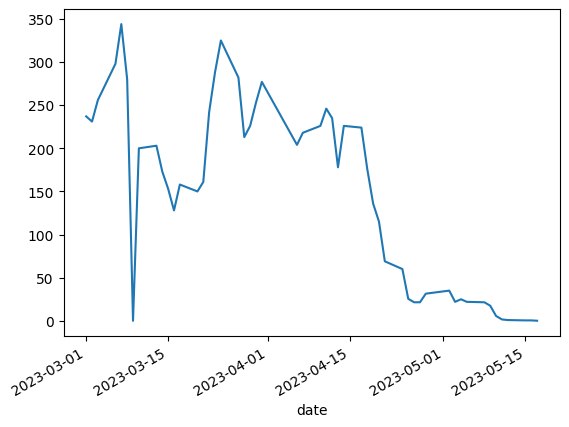

In [15]:
df2['Close'].plot()

In [16]:
df4=get_options(df, '202305', 'put', 15000, 'position')

In [17]:
df4.head()

,contract_date,strike_price,call_put,Open,High,Low,Close,volume,trading_session
date,,,,,,,,,
2023-03-01,202305,15000.0,put,380.0,380.0,285.0,285.0,26,position
2023-03-02,202305,15000.0,put,289.0,329.0,280.0,280.0,5,position
2023-03-03,202305,15000.0,put,261.0,261.0,246.0,256.0,18,position
2023-03-06,202305,15000.0,put,221.0,221.0,193.0,200.0,15,position
2023-03-07,202305,15000.0,put,193.0,193.0,166.0,172.0,8,position


<Axes: xlabel='date'>

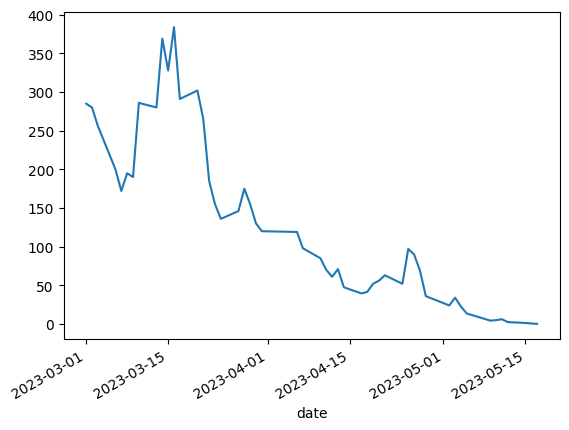

In [18]:
df4['Close'].plot()

## 3-期貨

## 期貨日成交資訊
https://finmindtrade.com/analysis/#/data/api

In [19]:
stock_index = "TX"
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanFuturesDaily",
    "start_date": start_date,
    "end_date": end_date,
    "data_id": stock_index,
}

data = requests.get(url, params=parameter)
data = data.json()


In [20]:
#data

In [21]:
df = pd.DataFrame(data["data"])
df.index = pd.to_datetime(df["date"])
df.head()

,date,futures_id,contract_date,open,max,min,close,spread,spread_per,volume,settlement_price,open_interest,trading_session
date,,,,,,,,,,,,,
2023-03-01,2023-03-01,TX,202303,15381.0,15555.0,15333.0,15544.0,3.0,0.02,82601,15546.0,69008,position
2023-03-01,2023-03-01,TX,202303,15540.0,15541.0,15391.0,15441.0,-100.0,-0.64,45956,0.0,0,after_market
2023-03-01,2023-03-01,TX,202304,15320.0,15519.0,15305.0,15510.0,4.0,0.03,1271,15510.0,2963,position
2023-03-01,2023-03-01,TX,202304,15500.0,15500.0,15360.0,15404.0,-102.0,-0.66,746,0.0,0,after_market
2023-03-01,2023-03-01,TX,202305,15300.0,15500.0,15299.0,15495.0,0.0,0.00,93,15495.0,343,position


In [22]:
def get_futures(option_df, contract_period, trading_session):
    
    option_df = df.loc[(df['contract_date'] == contract_period) & \
                       (df['trading_session'] == trading_session) ]
    return option_df

In [23]:
df3=get_futures(df, '202305', 'position')

In [24]:
df3.head()

,date,futures_id,contract_date,open,max,min,close,spread,spread_per,volume,settlement_price,open_interest,trading_session
date,,,,,,,,,,,,,
2023-03-01,2023-03-01,TX,202305,15300.0,15500.0,15299.0,15495.0,0.0,0.00,93,15495.0,343,position
2023-03-02,2023-03-02,TX,202305,15540.0,15567.0,15395.0,15490.0,-5.0,-0.03,87,15490.0,372,position
2023-03-03,2023-03-03,TX,202305,15573.0,15612.0,15521.0,15568.0,78.0,0.50,127,15568.0,406,position
2023-03-06,2023-03-06,TX,202305,15667.0,15775.0,15645.0,15713.0,145.0,0.93,243,15725.0,468,position
2023-03-07,2023-03-07,TX,202305,15716.0,15841.0,15704.0,15825.0,100.0,0.64,128,15825.0,537,position


<Axes: xlabel='date'>

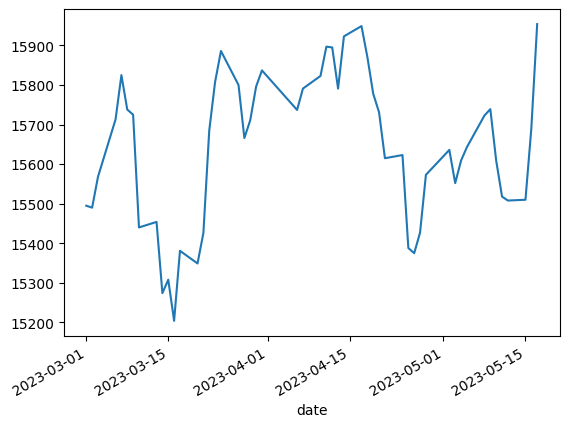

In [25]:
df3['close'].plot()

In [26]:
df3.close

date
2023-03-01    15495.0
2023-03-02    15490.0
2023-03-03    15568.0
2023-03-06    15713.0
2023-03-07    15825.0
2023-03-08    15738.0
2023-03-09    15725.0
2023-03-10    15440.0
2023-03-13    15454.0
2023-03-14    15274.0
2023-03-15    15308.0
2023-03-16    15204.0
2023-03-17    15381.0
2023-03-20    15349.0
2023-03-21    15426.0
2023-03-22    15685.0
2023-03-23    15808.0
2023-03-24    15886.0
2023-03-27    15800.0
2023-03-28    15666.0
2023-03-29    15711.0
2023-03-30    15796.0
2023-03-31    15837.0
2023-04-06    15737.0
2023-04-07    15791.0
2023-04-10    15823.0
2023-04-11    15897.0
2023-04-12    15895.0
2023-04-13    15791.0
2023-04-14    15923.0
2023-04-17    15949.0
2023-04-18    15871.0
2023-04-19    15778.0
2023-04-20    15731.0
2023-04-21    15615.0
2023-04-24    15623.0
2023-04-25    15388.0
2023-04-26    15375.0
2023-04-27    15427.0
2023-04-28    15573.0
2023-05-02    15636.0
2023-05-03    15552.0
2023-05-04    15609.0
2023-05-05    15643.0
2023-05-08    15723.0
2023-

In [27]:
df_many = pd.concat([df1.Close, df2.Close, df3.close, df4.Close], axis=1)


In [28]:
df_many.columns=['0050','05Call-16000','05Future', '05Put-15000']

In [29]:
df_many.head()

,0050,05Call-16000,05Future,05Put-15000
date,,,,
2023-03-01,119.35,237.0,15495.0,285.0
2023-03-02,119.25,231.0,15490.0,280.0
2023-03-03,119.35,256.0,15568.0,256.0
2023-03-06,120.50,298.0,15713.0,200.0
2023-03-07,121.30,344.0,15825.0,172.0


<Axes: xlabel='date'>

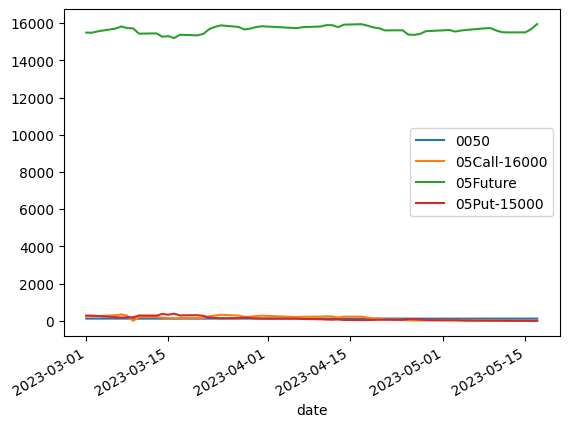

In [30]:
df_many.plot()

In [31]:
df_many['0050']=df_many['0050']/df_many.iloc[0][0]
df_many['05Call-16000']=df_many['05Call-16000']/df_many.iloc[0][1]
df_many['05Future']=df_many['05Future']/df_many.iloc[0][2]
df_many['05Put-15000']=df_many['05Put-15000']/df_many.iloc[0][3]

In [32]:
df_many.head()

,0050,05Call-16000,05Future,05Put-15000
date,,,,
2023-03-01,1.000000,1.000000,1.000000,1.000000
2023-03-02,0.999162,0.974684,0.999677,0.982456
2023-03-03,1.000000,1.080169,1.004711,0.898246
2023-03-06,1.009636,1.257384,1.014069,0.701754
2023-03-07,1.016339,1.451477,1.021297,0.603509


<Axes: xlabel='date'>

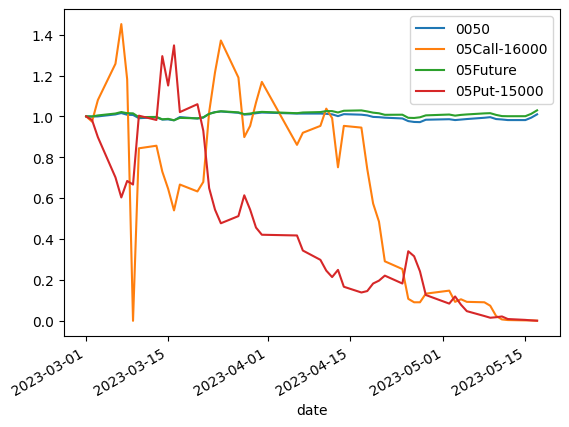

In [33]:
df_many.plot()

# 回測策略
如果快線超過慢線，表示股票進入上漲的趨勢，此時進行買空操作，分析圖表以![https://ithelp.ithome.com.tw/upload/images/20210919/20141586vhDmTPQp9Z.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586vhDmTPQp9Z.png)表示。\
如果快線跌過慢線，表示股票進入下跌的趨勢，此時進行賣空操作，分析圖表以![https://ithelp.ithome.com.tw/upload/images/20210919/20141586Y98Ntg07AE.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586Y98Ntg07AE.png)表示。\
綠色代表上一次操作的獲利情形，綠色表示獲利，綠色表示賠錢。

In [34]:
class SmaCross(Strategy):
    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, 20)
        self.slow_line = self.I(SMA, self.data.Close, 50)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )

            self.sell()


NameError: ignored

In [ ]:
class SmaCross1(Strategy):
# 只多不空  
    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, 20)
        self.slow_line = self.I(SMA, self.data.Close, 50)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            #self.buy()
            # If ema1 crosses above ema2, buy the asset
            #self.position.close()
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.position.close()
            #self.sell()

# 執行策略
- cash：本金。
- commission：交易費用。
- exclusive_orders：是否禁止多頭操作(同時只能買空或賣空)。
- trade_on_close：於收盤時交易，否則預設於開盤交易。

exclusive_orders：若為True時，每次操作前自動關閉(close)上次操作。
Buy(500)、Buy(1000) -> 最後持股1000
Buy(500)、Sell(500) -> 賣空500
.
如果trade_on_close是True，市價訂單將根據當前柱的收盤價而不是下一個柱的開盤價執行。

如果hedging是True，則允許同時雙向交易。如果False，則反向訂單首先以FIFO方式關閉現有交易。

如果exclusive_orders是True，每個新訂單都會自動關閉之前的交易/頭寸，每次最多進行一次有效的交易（多頭或空頭）。

In [ ]:
test = Backtest(
    df,
    SmaCross1,
    cash=1000000,
    commission=0.004,
    exclusive_orders=True,
    trade_on_close=True,
)
result = test.run()


# 分析結果
將分析結果儲存，並利用預設瀏覽器開啟，
result為詳細的分析結果。

In [ ]:
test.plot()
print(result)

In [ ]:
#test.plot(filename=f"./backtest_result/{stock_index}.html")
#print(result)

![https://ithelp.ithome.com.tw/upload/images/20210919/20141586nTsggfN69g.png](https://ithelp.ithome.com.tw/upload/images/20210919/20141586nTsggfN69g.png)


欄位 | 說明
------------- | -------------
Start                  |   起始時間
End                    |   結束時間
Duration               |   經過天數
Exposure [%]           |   投資比率
Equity Final [$]       |   最終資產
Equity Peak [$]        |   最高資產
Return [%]             |   報酬率
Buy & Hold Return [%]  |   買入持有報酬率
Max. Drawdown [%]      |   最大交易回落
Avg. Drawdown [%]      |   平均交易回落
Max. Drawdown Duration |   最長交易回落期間
Avg. Drawdown Duration |   平均交易回落期間
Win Rate [%]           |   勝率
Best Trade [%]         |   最好交易報酬率
Worst Trade [%]        |   最差交易報酬率
Avg. Trade [%]         |   平均交易報酬率
Max. Trade Duration    |   最長交易間隔
Avg. Trade Duration    |   平均交易間隔
Expectancy [%]         |   期望值
SQN                    |   系統品質指標
Sharpe Ratio           |   夏普比率
Sortino Ratio          |   索丁諾比率
Calmar Ratio           |   卡瑪比率
_strategy              |   使用策略名稱
*From https://hackmd.io/@s02260441/SkA7IWVJv*
